___

## CMIS 3253 - Practical Assignment
## Leaf Data Analysis
# 182061
___


## Importing Libraries

In [1]:
import graphviz
import pydotplus
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
from six import StringIO
from sklearn import tree
import matplotlib.pyplot as plt
from keras.utils import np_utils
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score

#Importing classifiers
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#df = pd.read_csv("dataset/leaf.csv")

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/leaf-classification/dataset/leaf.csv')

## Data Preparation

In [4]:
df.head()

,1,1.1,0.72694,1.4742,0.32396,0.98535,1.2,0.83592,0.0046566,0.0039465,0.04779,0.12795,0.016108,0.0052323,0.00027477,1.1756
0,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
1,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
2,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
3,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214
4,1,6,0.72997,1.4892,0.34284,0.98755,1.00000,0.84482,0.004945,0.004451,0.010487,0.058528,0.003414,0.001125,0.000025,0.34068


In [5]:
columns = ['Species-(Class)', 'Specimen-Number', 'Eccentricity', 'Aspect-Ratio', 'Elongation', 'Solidity', 'Stochastic-Convexity', 'Isoperimetric-Factor', 'Maximal-Indentation-Depth', 'Lobedness', 'Average-Intensity', 'Average-Contrast', 'Smoothness', 'Third-moment', 'Uniformity', 'Entropy']

In [6]:
features = ['Eccentricity', 'Aspect-Ratio', 'Elongation', 'Solidity', 'Stochastic-Convexity', 'Isoperimetric-Factor', 'Maximal-Indentation-Depth', 'Lobedness', 'Average-Intensity', 'Average-Contrast', 'Smoothness', 'Third-moment', 'Uniformity', 'Entropy']

In [7]:
#leaf_dataset = pd.read_csv('dataset/leaf.csv', names=columns)

leaf_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/leaf-classification/dataset/leaf.csv', names=columns)

In [8]:
print(leaf_dataset.columns)

Index(['Species-(Class)', 'Specimen-Number', 'Eccentricity', 'Aspect-Ratio',
       'Elongation', 'Solidity', 'Stochastic-Convexity',
       'Isoperimetric-Factor', 'Maximal-Indentation-Depth', 'Lobedness',
       'Average-Intensity', 'Average-Contrast', 'Smoothness', 'Third-moment',
       'Uniformity', 'Entropy'],
      dtype='object')


In [9]:
leaf_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Species-(Class)            340 non-null    int64  
 1   Specimen-Number            340 non-null    int64  
 2   Eccentricity               340 non-null    float64
 3   Aspect-Ratio               340 non-null    float64
 4   Elongation                 340 non-null    float64
 5   Solidity                   340 non-null    float64
 6   Stochastic-Convexity       340 non-null    float64
 7   Isoperimetric-Factor       340 non-null    float64
 8   Maximal-Indentation-Depth  340 non-null    float64
 9   Lobedness                  340 non-null    float64
 10  Average-Intensity          340 non-null    float64
 11  Average-Contrast           340 non-null    float64
 12  Smoothness                 340 non-null    float64
 13  Third-moment               340 non-null    float64

In [10]:
leaf_dataset.head()

,Species-(Class),Specimen-Number,Eccentricity,Aspect-Ratio,Elongation,Solidity,Stochastic-Convexity,Isoperimetric-Factor,Maximal-Indentation-Depth,Lobedness,Average-Intensity,Average-Contrast,Smoothness,Third-moment,Uniformity,Entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214


## Data Preprocessing

Finding and filling missing values

In [11]:
print(leaf_dataset.isnull().any(axis=1))

0      False
1      False
2      False
3      False
4      False
       ...  
335    False
336    False
337    False
338    False
339    False
Length: 340, dtype: bool


In [12]:
print(leaf_dataset.isnull().sum(axis=1))

0      0
1      0
2      0
3      0
4      0
      ..
335    0
336    0
337    0
338    0
339    0
Length: 340, dtype: int64


In [13]:
X = leaf_dataset.iloc[:, 2:16].values
y = leaf_dataset.iloc[:, 0].values

In [14]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :]) #Selecting and filling the missing values from all rows and all the coloumns in X array
X[:, :] = imputer.transform(X[:, :])

In [15]:
print(X)

[[7.2694e-01 1.4742e+00 3.2396e-01 ... 5.2323e-03 2.7477e-04 1.1756e+00]
 [7.4173e-01 1.5257e+00 3.6116e-01 ... 2.7080e-03 7.4846e-05 6.9659e-01]
 [7.6722e-01 1.5725e+00 3.8998e-01 ... 9.2068e-04 3.7886e-05 4.4348e-01]
 ...
 [3.5344e-01 1.0329e+00 7.8147e-01 ... 1.6123e-02 4.5288e-04 1.6935e+00]
 [5.9988e-01 1.1427e+00 7.1532e-01 ... 6.1900e-03 2.6454e-04 1.1526e+00]
 [4.7195e-01 1.0901e+00 8.5409e-01 ... 1.3487e-02 3.2855e-04 1.5623e+00]]


In [16]:
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  5  5  5  5  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13
 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15
 15 15 15 22 22 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23
 23 23 24 24 24 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25
 26 26 26 26 26 26 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 27 28
 28 28 28 28 28 28 28 28 28 28 28 29 29 29 29 29 29 29 29 29 29 29 29 30
 30 30 30 30 30 30 30 30 30 30 30 31 31 31 31 31 31 31 31 31 31 31 32 32
 32 32 32 32 32 32 32 32 32 33 33 33 33 33 33 33 33 33 33 33 34 34 34 34
 34 34 34 34 34 34 34 35 35 35 35 35 35 35 35 35 35

Label Encoding

In [17]:
label_encode = LabelEncoder()
y = label_encode.fit_transform(y)

In [18]:
print(y)

[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2
  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  4  4  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  8  8  8  9
  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12
 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14
 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18
 19 19 19 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 20 21
 21 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22 22 22 22 22 22 22 23
 23 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24 24 25 25
 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 26 27 27 27 27
 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28 28 28

In [19]:
classes = ['0 : Quercus suber', '1 : Salix atrocinera', '2 : Populus nigra', '3 : Alnus sp.', '4: Quercus robur', '5: Crataegus monogyna', '6 : Ilex aquifolium', '7 : Nerium oleander', '8: Betula pubescens', '9: Tilia tomentosa', '10: Acer palmatum', '11 : Celtis sp.', '12 : Corylus avellana', '13 : Castanea sativa', '14 : Populus alba', '15 : Primula vulgaris', '16 : Erodium sp.', '17 : Bougainvillea sp.', '18 : Arisarum vulgare', '19 : Euonymus japonicus', '20 : Ilex perado ssp. azorica', '21 : Magnolia soulangeana', '22 : Buxus sempervirens', '23 : Urtica dioica', '24 : Podocarpus sp.', '25 : Acca sellowiana', '26 : Hydrangea sp.', '27 : Pseudosasa japonica', '28 : Magnolia grandiflora', '29 : Geranium sp.']

Splitting the dataset into training set and test set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
print(X_train)

[[8.7163e-01 2.0659e+00 5.5339e-01 ... 6.6921e-03 1.6133e-04 1.4016e+00]
 [3.9092e-01 1.0870e+00 6.8174e-01 ... 2.1177e-03 2.1044e-04 9.0082e-01]
 [7.7982e-01 1.6215e+00 3.9222e-01 ... 2.4664e-03 1.4676e-04 6.6975e-01]
 ...
 [3.8564e-01 1.0471e+00 2.3328e-01 ... 2.2000e-02 8.6835e-04 1.9757e+00]
 [4.9634e-01 1.1832e+00 2.2855e-01 ... 5.1731e-03 2.3865e-04 1.1489e+00]
 [2.3041e-01 1.1294e+00 2.5496e-01 ... 2.4180e-02 4.2353e-04 1.6648e+00]]


In [22]:
print(X_test)

[[9.9593e-01 1.0120e+01 9.2461e-01 8.0662e-01 9.0702e-01 1.5053e-01
  1.2257e-01 2.7342e+00 8.2902e-03 5.2333e-02 2.7313e-03 9.0459e-04
  1.5362e-05 2.7303e-01]
 [5.0692e-01 1.1270e+00 6.7203e-01 5.3024e-01 7.5263e-01 1.6792e-01
  1.3006e-01 3.0788e+00 1.5279e-02 5.7592e-02 3.3059e-03 7.2847e-04
  1.0983e-04 6.7289e-01]
 [2.4465e-01 1.0470e+00 6.0511e-01 5.6524e-01 7.9474e-01 2.1788e-01
  1.2522e-01 2.8540e+00 3.7595e-02 1.2700e-01 1.5874e-02 6.5870e-03
  1.0798e-04 8.3310e-01]
 [8.6545e-01 1.8803e+00 6.2039e-01 8.2443e-01 8.5439e-01 3.3077e-01
  4.7000e-02 4.0204e-01 3.9518e-02 1.1570e-01 1.3210e-02 4.2406e-03
  2.0084e-04 1.0136e+00]
 [8.2866e-01 1.9848e+00 5.0917e-01 9.4180e-01 9.9825e-01 5.5942e-01
  2.5524e-02 1.1857e-01 8.0103e-02 1.6692e-01 2.7107e-02 8.6548e-03
  4.2650e-04 1.8038e+00]
 [7.2719e-01 1.4779e+00 3.2980e-01 9.9388e-01 1.0000e+00 8.4230e-01
  2.9668e-03 1.6019e-03 2.6340e-02 8.1903e-02 6.6634e-03 1.7846e-03
  1.9390e-04 9.8050e-01]
 [9.6652e-01 3.8162e+00 7.4273e-01

In [23]:
print(y_train)

[ 6 10  0 12 28 26 26  7 12 17 22  6  9 23  8 17 12  1  2 24 12 19 21 23
 18 21 13 18  1 17  7 28  1 12 28  2 21 20 14 21 12 15  5 10 11  1  0 26
 19  8  2  2 25 26  5 16  0 20 21  8 28 17 20 14 19 15  8  6 20  9 24  9
 15  6  2  3 10  6 23 13 11 12 17  8 25 21 25 13 22 14 20 26 22 11  3 22
 20 15 10 23 19 10 27 28 21 26 14 17 19 13 19  0 10 16 19 10 22 25 11  7
  2  8 24  9 16 24 11 16 21  4 27  6 22  8 16  7 13  1  3  2 14 12 21 11
 24  4  9 22 15 17 10  4  8 23 17 12  2 29 12 24  0  0 26 25 28  9 19 16
 25 19 18  9 15  9  3 18  6 13  4  3 24  0 29 17 26  2 23 21 20 14 25 12
  6 11 11  0  6  1 13  4 27 28 19 25 20 18 18 27 22 29 27 23 17 14  4 19
 16 22  9  5  0  4  7 17  3 23  8  5 23 21  1  8 23 14 29 11 28 21  5  4
 15 16 29 16 14  5  4 20 22  1 27 13 24 16 25 22 27 13 11 13  9  8 29 18
 10 29  1 16  7  9 23  9]


In [24]:
print(y_test)

[24 10 10  4 11 20 15 24 29  2 11 19 22 13 10 15 10 28 23  0 24  5 14 10
 12  8 10 18 12 27 15  3  9 27  7  0 26 28 10  7  8  0 13 20  4 27 25 25
  7  3 28 15 17  8  6 17  5 29 29  4 26 26 27 15 18  7  7  1]


Feature scaling

In [25]:
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

In [26]:
print(X_train)

[[ 0.76163594 -0.09999249  0.28756748 ...  0.12964517 -0.54447525
   0.34892358]
 [-1.54720948 -0.48953753  0.96697955 ... -0.75242946 -0.43518234
  -0.48890675]
 [ 0.32067341 -0.27683774 -0.56557506 ... -0.68519017 -0.57690037
  -0.87549857]
 ...
 [-1.57256927 -0.5054154  -1.40691323 ...  3.08144437  1.02897767
   1.30942198]
 [-1.04087825 -0.45125555 -1.43195117 ... -0.1632613  -0.37240178
  -0.07385633]
 [-2.31813743 -0.47266481 -1.29215162 ...  3.50181047  0.0390434
   0.78927052]]


In [27]:
print(X_test)

[[ 1.35864762e+00  3.10506906e+00  2.25259553e+00 -9.70838256e-01
  -3.76868278e-01 -1.89570817e+00  2.37951287e+00  2.26641625e+00
  -1.22313269e+00 -1.42133641e+00 -1.12200236e+00 -9.86351627e-01
  -8.69322882e-01 -1.53923124e+00]
 [-9.90062617e-01 -4.73619866e-01  9.15580323e-01 -3.55530582e+00
  -1.77293671e+00 -1.81221115e+00  2.58400054e+00  2.61172239e+00
  -1.03112097e+00 -1.32002515e+00 -1.07996110e+00 -1.02031258e+00
  -6.59087033e-01 -8.70245192e-01]
 [-2.24974285e+00 -5.05455195e-01  5.61343812e-01 -3.22801598e+00
  -1.39215789e+00 -1.57233126e+00  2.45186165e+00  2.38646174e+00
  -4.18006607e-01  1.70753024e-02 -1.60401773e-01  1.09378897e-01
  -6.63204155e-01 -6.02205740e-01]
 [ 7.31953456e-01 -1.73850449e-01  6.42227463e-01 -8.04294486e-01
  -8.52773983e-01 -1.03029681e+00  3.16344225e-01 -7.05226962e-02
  -3.65173710e-01 -2.00611926e-01 -3.55316362e-01 -3.43073865e-01
  -4.56546865e-01 -3.00220090e-01]
 [ 5.55251447e-01 -1.32265551e-01  5.34918880e-02  2.93248598e-01
  

## Training the Dataset with Different Classifiers

**Decision Tree classifier**

Training with default parameters

In [28]:
dtclf1 = DecisionTreeClassifier() # Gini as default criterion

In [29]:
dtclf1.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
dtclf1_y_pred = dtclf1.predict(X_test)

Confusion Matrix

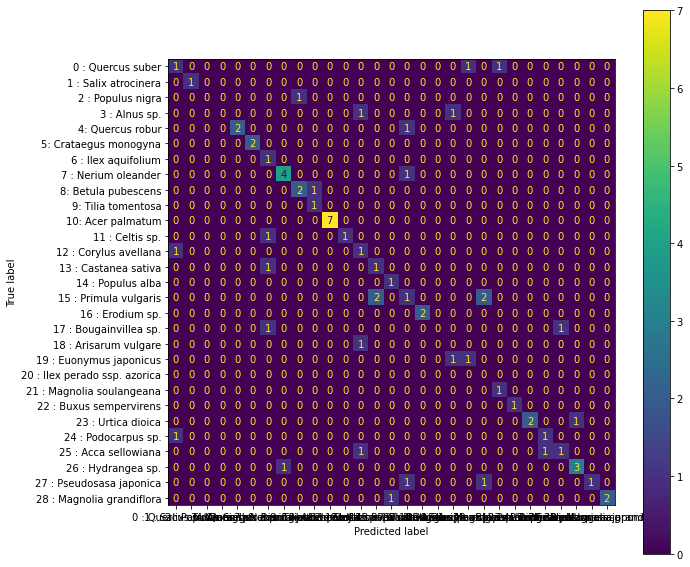

In [31]:
dtclf1_cm = confusion_matrix(y_test, dtclf1_y_pred)
plt.rcParams['figure.figsize'] = [10, 10]
dtclf1_cm_display = ConfusionMatrixDisplay(confusion_matrix = dtclf1_cm, display_labels=classes)

dtclf1_cm_display.plot()

In [32]:
dtclf1_acc_score = accuracy_score(y_test, dtclf1_y_pred)

print("Accuracy: {:.2f}%".format(dtclf1_acc_score * 100))

Accuracy: 60.29%


Classification Report

In [33]:
print(classification_report(y_test, dtclf1_y_pred))

              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         2
           6       0.25      1.00      0.40         1
           7       0.80      0.80      0.80         5
           8       0.67      0.67      0.67         3
           9       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         7
          11       1.00      0.50      0.67         2
          12       0.25      0.50      0.33         2
          13       0.33      0.50      0.40         2
          14       0.50      1.00      0.67         1
          15       0.25      0.20      0.22         5
          17       1.00      1.00      1.00         2
          18       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

In [34]:
def get_metrics(y_test, dtclf1_y_pred):
    accuracy = accuracy_score(y_test, dtclf1_y_pred)
    precision = precision_score(y_test, dtclf1_y_pred, average='weighted')
    recall = recall_score(y_test, dtclf1_y_pred, average='weighted')
    f1 = f1_score(y_test, dtclf1_y_pred, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, dtclf1_y_pred)

print("accuracy = %.2f%% \nprecision = %.2f%% \nrecall = %.2f%% \nf1 = %.2f%%" % (accuracy * 100, precision * 100, recall * 100, f1 * 100))

accuracy = 60.29% 
precision = 65.69% 
recall = 60.29% 
f1 = 60.60%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



True Positive Rate (TPR) and False Positive Rate (FPR)

In [35]:
FP = confusion_matrix(y_test, dtclf1_y_pred).sum(axis=0) - np.diag(confusion_matrix(y_test, dtclf1_y_pred))  
FN = confusion_matrix(y_test, dtclf1_y_pred).sum(axis=1) - np.diag(confusion_matrix(y_test, dtclf1_y_pred)) 
TP = np.diag(confusion_matrix(y_test, dtclf1_y_pred)) 
TN = confusion_matrix(y_test, dtclf1_y_pred).sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

np.seterr(divide='ignore', invalid='ignore')

<ipython-input-35-ab6b20ab688f>:7: RuntimeWarning:

invalid value encountered in true_divide

<ipython-input-35-ab6b20ab688f>:11: RuntimeWarning:

invalid value encountered in true_divide

<ipython-input-35-ab6b20ab688f>:17: RuntimeWarning:

invalid value encountered in true_divide

<ipython-input-35-ab6b20ab688f>:19: RuntimeWarning:

invalid value encountered in true_divide



{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [36]:
TPR

array([0.33333333, 1.        , 0.        , 0.        , 0.66666667,
       1.        , 1.        , 0.8       , 0.66666667, 1.        ,
       1.        , 0.5       , 0.5       , 0.5       , 1.        ,
       0.2       , 1.        , 0.        , 0.        , 0.5       ,
              nan, 1.        , 1.        , 0.66666667, 0.5       ,
       0.33333333, 0.75      , 0.33333333, 0.66666667])

In [37]:
FPR

array([0.03076923, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04477612, 0.01587302, 0.01538462, 0.01492537,
       0.        , 0.        , 0.04545455, 0.03030303, 0.01492537,
       0.04761905, 0.        , 0.        , 0.02985075, 0.01515152,
       0.04411765, 0.01492537, 0.        , 0.        , 0.01515152,
       0.01538462, 0.015625  , 0.        , 0.        ])

In [38]:
# fpr = FPR
# tpr = TPR

# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

ROC Curve

In [39]:
# label_encoder=LabelEncoder()
# label_encoder.fit(y)
# y=label_encoder.transform(y)
# classes=label_encoder.classes_
# pred_prob = dtclf1.predict_proba(X_test)
# y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))
# fpr = {}
# tpr = {}
# thresh ={}
# roc_auc = dict()
# n_class = classes.shape[0]

# for i in range(n_class):    
#     fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    
#     roc_auc[i] = auc(fpr[i], tpr[i])
       
#     plt.plot(fpr[i], tpr[i], linestyle='--', 
#              label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

# plt.plot([0,1],[0,1],'b--')
# plt.xlim([0,1])
# plt.ylim([0,1.05])
# plt.title('Multiclass ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive rate')
# plt.legend(loc='lower right')
# plt.show()

Plotting the Tree

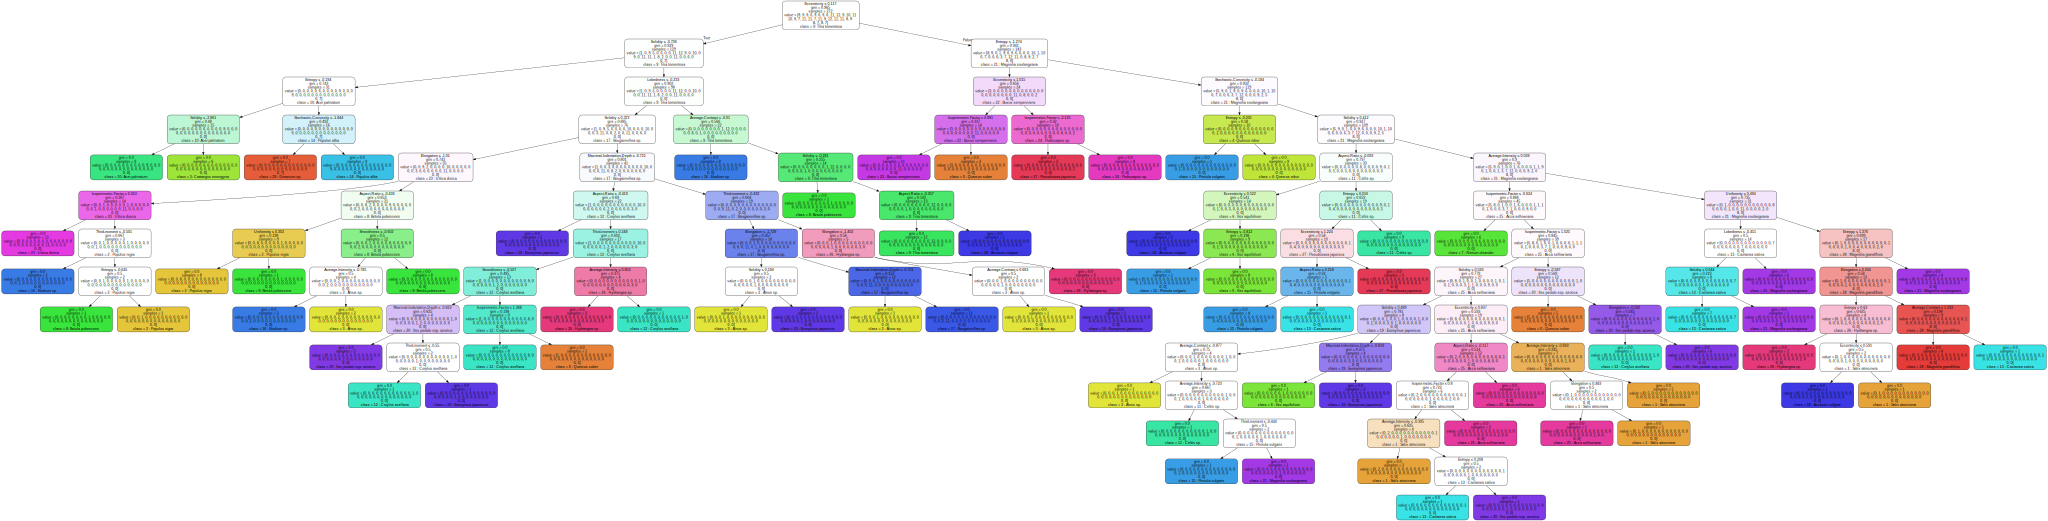

In [40]:
dot_data = tree.export_graphviz(dtclf1,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True,
                                feature_names = features,
                                class_names = classes)

dtclf1_graph = graphviz.Source(dot_data)
dtclf1_graph

In [41]:
dtclf1_graph.render('/content/drive/MyDrive/Colab Notebooks/leaf-classification/images/Gini_Index')

'/content/drive/MyDrive/Colab Notebooks/leaf-classification/images/Gini_Index.pdf'

Training with custom parameters

In [42]:
dtclf2 = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [43]:
dtclf2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [44]:
dtclf2_y_pred = dtclf2.predict(X_test)

Confusion Matrix

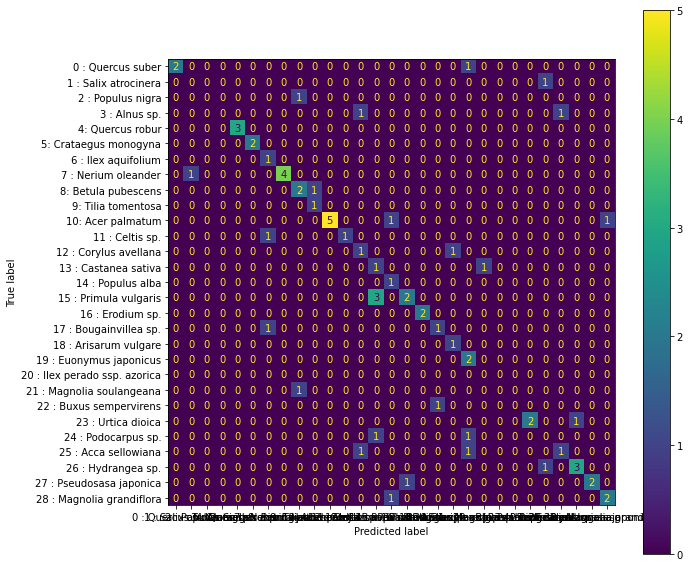

In [45]:
dtclf2_cm = confusion_matrix(y_test, dtclf2_y_pred)
plt.rcParams['figure.figsize'] = [10, 10]
dtclf2_cm_display = ConfusionMatrixDisplay(confusion_matrix = dtclf2_cm, display_labels=classes)

dtclf2_cm_display.plot()

In [46]:
dtclf2_acc_score = accuracy_score(y_test, dtclf2_y_pred)

print("Accuracy: {:.2f}%".format(dtclf2_acc_score * 100))

Accuracy: 61.76%


Classification Report

In [47]:
print(classification_report(y_test, dtclf2_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       0.33      1.00      0.50         1
           7       1.00      0.80      0.89         5
           8       0.50      0.67      0.57         3
           9       0.50      1.00      0.67         1
          10       1.00      0.71      0.83         7
          11       1.00      0.50      0.67         2
          12       0.33      0.50      0.40         2
          13       0.20      0.50      0.29         2
          14       0.33      1.00      0.50         1
          15       0.67      0.40      0.50         5
          17       1.00      1.00      1.00         2
          18       0.50    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

In [48]:
def get_metrics(y_test, dtclf2_y_pred):
    accuracy = accuracy_score(y_test, dtclf2_y_pred)
    precision = precision_score(y_test, dtclf2_y_pred, average='weighted')
    recall = recall_score(y_test, dtclf2_y_pred, average='weighted')
    f1 = f1_score(y_test, dtclf2_y_pred, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, dtclf1_y_pred)

print("accuracy = %.2f%% \nprecision = %.2f%% \nrecall = %.2f%% \nf1 = %.2f%%" % (accuracy * 100, precision * 100, recall * 100, f1 * 100))

accuracy = 60.29% 
precision = 65.69% 
recall = 60.29% 
f1 = 60.60%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



True Positive Rate (TPR) and False Positive Rate (FPR)

In [49]:
FP = confusion_matrix(y_test, dtclf2_y_pred).sum(axis=0) - np.diag(confusion_matrix(y_test, dtclf2_y_pred))  
FN = confusion_matrix(y_test, dtclf2_y_pred).sum(axis=1) - np.diag(confusion_matrix(y_test, dtclf2_y_pred)) 
TP = np.diag(confusion_matrix(y_test, dtclf2_y_pred)) 
TN = confusion_matrix(y_test, dtclf2_y_pred).sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [50]:
TPR

array([0.66666667, 0.        , 0.        , 0.        , 1.        ,
       1.        , 1.        , 0.8       , 0.66666667, 1.        ,
       0.71428571, 0.5       , 0.5       , 0.5       , 1.        ,
       0.4       , 1.        , 0.5       , 1.        , 1.        ,
              nan, 0.        , 0.        , 0.66666667, 0.        ,
       0.33333333, 0.75      , 0.66666667, 0.66666667])

In [51]:
FPR

array([0.        , 0.01492537, 0.        , 0.        , 0.        ,
       0.        , 0.02985075, 0.        , 0.03076923, 0.01492537,
       0.        , 0.        , 0.03030303, 0.06060606, 0.02985075,
       0.01587302, 0.        , 0.01515152, 0.01492537, 0.04545455,
       0.01470588, 0.        , 0.        , 0.        , 0.03030303,
       0.01538462, 0.015625  , 0.        , 0.01538462])

Plotting the Tree

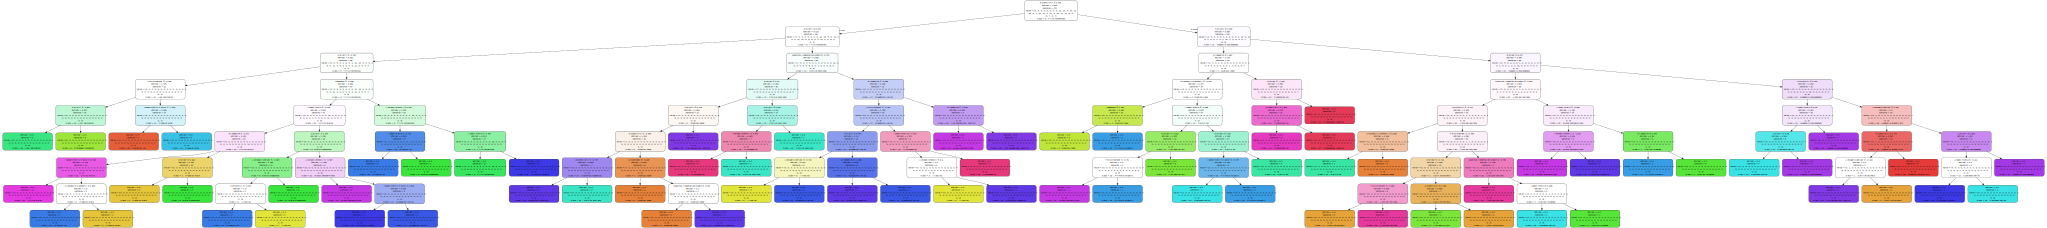

In [52]:
dot_data = tree.export_graphviz(dtclf2,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True,
                                feature_names = features,
                                class_names = classes)

dtclf2_graph = graphviz.Source(dot_data)
dtclf2_graph

In [53]:
dtclf1_graph.render('/content/drive/MyDrive/Colab Notebooks/leaf-classification/images/Entropy')

'/content/drive/MyDrive/Colab Notebooks/leaf-classification/images/Entropy.pdf'

**KNN classifier**

Training with default parameters

In [54]:
knnclf1 = KNeighborsClassifier()

In [55]:
knnclf1.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
knnclf1_y_pred = knnclf1.predict(X_test)

Confusion Matrix

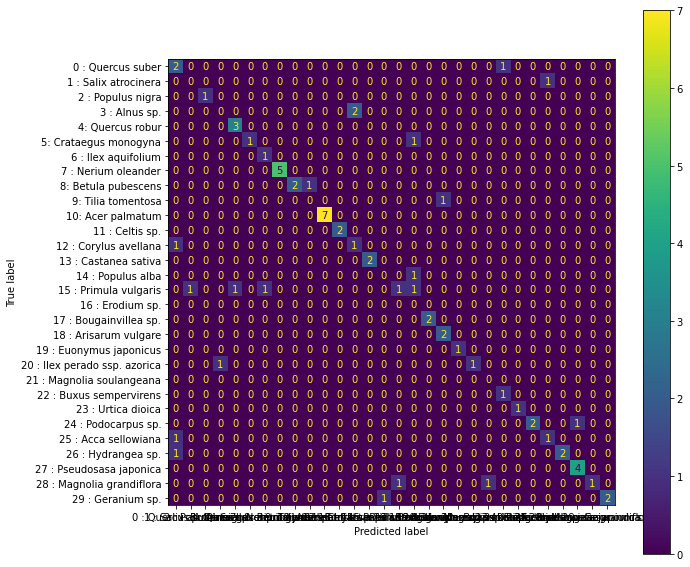

In [57]:
knnclf1_cm = confusion_matrix(y_test, knnclf1_y_pred)

knnclf1_cm = confusion_matrix(y_test, knnclf1_y_pred)
plt.rcParams['figure.figsize'] = [10, 10]
knnclf1_cm_display = ConfusionMatrixDisplay(confusion_matrix = knnclf1_cm, display_labels=classes)

knnclf1_cm_display.plot()

In [58]:
knnclf1_acc_score = accuracy_score(y_test, knnclf1_y_pred)

print("Accuracy: {:.2f}%".format(knnclf1_acc_score * 100))

Accuracy: 70.59%


Classification Report

In [59]:
print(classification_report(y_test, knnclf1_y_pred))

              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         2
           4       0.75      1.00      0.86         3
           5       1.00      0.50      0.67         2
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         5
           8       1.00      0.67      0.80         3
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         2
          12       0.33      0.50      0.40         2
          13       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         1
          15       0.50      0.20      0.29         5
          16       0.00      0.00      0.00         0
          17       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [60]:
def get_metrics(y_test, knnclf1_y_pred):
    accuracy = accuracy_score(y_test, knnclf1_y_pred)
    precision = precision_score(y_test, knnclf1_y_pred, average='weighted')
    recall = recall_score(y_test, knnclf1_y_pred, average='weighted')
    f1 = f1_score(y_test, knnclf1_y_pred, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, knnclf1_y_pred)

print("accuracy = %.2f%% \nprecision = %.2f%% \nrecall = %.2f%% \nf1 = %.2f%%" % (accuracy * 100, precision * 100, recall * 100, f1 * 100))

accuracy = 70.59% 
precision = 78.16% 
recall = 70.59% 
f1 = 71.41%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



True Positive Rate (TPR) and False Positive Rate (FPR)

In [61]:
FP = confusion_matrix(y_test, knnclf1_y_pred).sum(axis=0) - np.diag(confusion_matrix(y_test, knnclf1_y_pred))  
FN = confusion_matrix(y_test, knnclf1_y_pred).sum(axis=1) - np.diag(confusion_matrix(y_test, knnclf1_y_pred)) 
TP = np.diag(confusion_matrix(y_test, knnclf1_y_pred)) 
TN = confusion_matrix(y_test, knnclf1_y_pred).sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [62]:
TPR

array([0.66666667, 0.        , 1.        , 0.        , 1.        ,
       0.5       , 1.        , 1.        , 0.66666667, 0.        ,
       1.        , 1.        , 0.5       , 1.        , 0.        ,
       0.2       ,        nan, 1.        , 1.        , 1.        ,
       0.5       ,        nan, 1.        , 1.        , 0.66666667,
       0.5       , 0.66666667, 1.        , 0.33333333, 0.66666667])

In [63]:
FPR

array([0.04615385, 0.01492537, 0.        , 0.01515152, 0.01538462,
       0.        , 0.01492537, 0.        , 0.        , 0.01492537,
       0.        , 0.        , 0.03030303, 0.        , 0.01492537,
       0.01587302, 0.04411765, 0.        , 0.01515152, 0.        ,
       0.        , 0.01470588, 0.01492537, 0.        , 0.        ,
       0.01515152, 0.        , 0.015625  , 0.        , 0.        ])

Training with custom parameters

In [64]:
knnclf2 = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='minkowski', p=1)

In [65]:
knnclf2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')

In [66]:
knnclf2_y_pred = knnclf2.predict(X_test)

Confusion Matrix

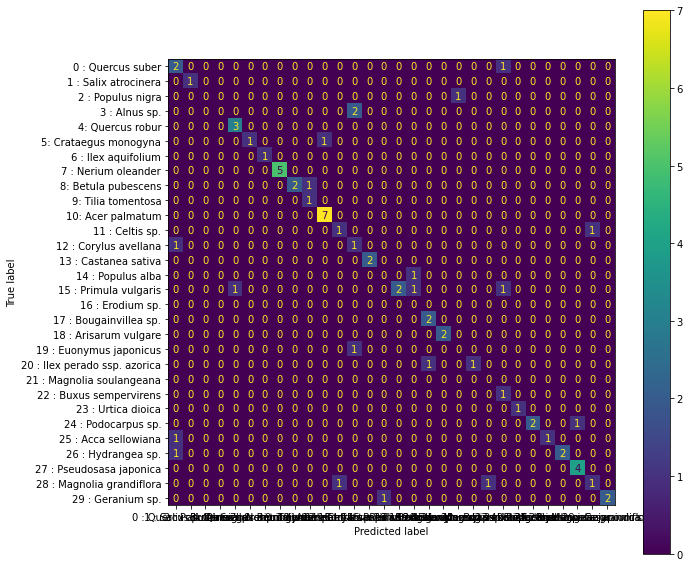

In [67]:
knnclf2_cm = confusion_matrix(y_test, knnclf2_y_pred)

knnclf2_cm = confusion_matrix(y_test, knnclf2_y_pred)
plt.rcParams['figure.figsize'] = [10, 10]
knnclf2_cm_display = ConfusionMatrixDisplay(confusion_matrix = knnclf2_cm, display_labels=classes)

knnclf2_cm_display.plot()

In [68]:
knnclf2_acc_score = accuracy_score(y_test, knnclf2_y_pred)

print("Accuracy: {:.2f}%".format(knnclf2_acc_score * 100))

Accuracy: 70.59%


Classification Report

In [69]:
print(classification_report(y_test, knnclf2_y_pred))

              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.75      1.00      0.86         3
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5
           8       1.00      0.67      0.80         3
           9       0.50      1.00      0.67         1
          10       0.88      1.00      0.93         7
          11       0.50      0.50      0.50         2
          12       0.25      0.50      0.33         2
          13       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         1
          15       1.00      0.40      0.57         5
          16       0.00      0.00      0.00         0
          17       0.67    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

In [70]:
def get_metrics(y_test, knnclf2_y_pred):
    accuracy = accuracy_score(y_test, knnclf2_y_pred)
    precision = precision_score(y_test, knnclf2_y_pred, average='weighted')
    recall = recall_score(y_test, knnclf2_y_pred, average='weighted')
    f1 = f1_score(y_test, knnclf2_y_pred, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, knnclf2_y_pred)

print("accuracy = %.2f%% \nprecision = %.2f%% \nrecall = %.2f%% \nf1 = %.2f%%" % (accuracy * 100, precision * 100, recall * 100, f1 * 100))

accuracy = 70.59% 
precision = 77.86% 
recall = 70.59% 
f1 = 70.96%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



True Positive Rate (TPR) and False Positive Rate (FPR)

In [71]:
FP = confusion_matrix(y_test, knnclf2_y_pred).sum(axis=0) - np.diag(confusion_matrix(y_test, knnclf2_y_pred))  
FN = confusion_matrix(y_test, knnclf2_y_pred).sum(axis=1) - np.diag(confusion_matrix(y_test, knnclf2_y_pred)) 
TP = np.diag(confusion_matrix(y_test, knnclf2_y_pred)) 
TN = confusion_matrix(y_test, knnclf2_y_pred).sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [72]:
TPR

array([0.66666667, 1.        , 0.        , 0.        , 1.        ,
       0.5       , 1.        , 1.        , 0.66666667, 1.        ,
       1.        , 0.5       , 0.5       , 1.        , 0.        ,
       0.4       ,        nan, 1.        , 1.        , 0.        ,
       0.5       ,        nan, 1.        , 1.        , 0.66666667,
       0.5       , 0.66666667, 1.        , 0.33333333, 0.66666667])

In [73]:
FPR

array([0.04615385, 0.        , 0.        , 0.        , 0.01538462,
       0.        , 0.        , 0.        , 0.        , 0.01492537,
       0.01639344, 0.01515152, 0.04545455, 0.        , 0.01492537,
       0.        , 0.02941176, 0.01515152, 0.        , 0.01492537,
       0.        , 0.01470588, 0.02985075, 0.        , 0.        ,
       0.        , 0.        , 0.015625  , 0.01538462, 0.        ])

**Linear Discriminant Analysis (LDA)**

Training with default parameters

In [74]:
ldaclf = LinearDiscriminantAnalysis()

In [75]:
ldaclf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [76]:
ldaclf_y_pred = ldaclf.predict(X_test)

Confusion Matrix

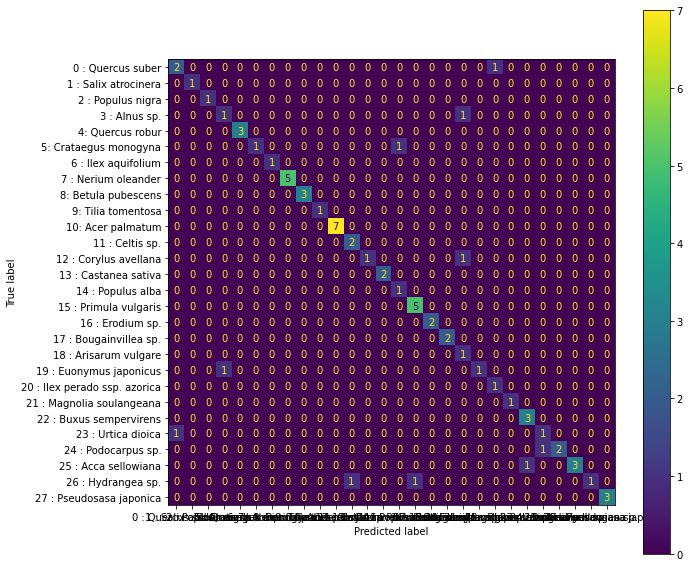

In [77]:
ldaclf_cm = confusion_matrix(y_test, ldaclf_y_pred)

ldaclf_cm = confusion_matrix(y_test, ldaclf_y_pred)
plt.rcParams['figure.figsize'] = [10, 10]
ldaclf_cm_display = ConfusionMatrixDisplay(confusion_matrix = ldaclf_cm, display_labels=classes)

ldaclf_cm_display.plot()

In [78]:
ldaclf_acc_score = accuracy_score(y_test, ldaclf_y_pred)

print("Accuracy: {:.2f}%".format(ldaclf_acc_score * 100))

Accuracy: 85.29%


Classification Report

In [79]:
print(classification_report(y_test, ldaclf_y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.50      0.50      0.50         2
           4       1.00      1.00      1.00         3
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         7
          11       0.67      1.00      0.80         2
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       0.50      1.00      0.67         1
          15       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         2
          18       1.00    

In [80]:
def get_metrics(y_test, ldaclf_y_pred):
    accuracy = accuracy_score(y_test, ldaclf_y_pred)
    precision = precision_score(y_test, ldaclf_y_pred, average='weighted')
    recall = recall_score(y_test, ldaclf_y_pred, average='weighted')
    f1 = f1_score(y_test, ldaclf_y_pred, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, ldaclf_y_pred)

print("accuracy = %.2f%% \nprecision = %.2f%% \nrecall = %.2f%% \nf1 = %.2f%%" % (accuracy * 100, precision * 100, recall * 100, f1 * 100))

accuracy = 85.29% 
precision = 89.83% 
recall = 85.29% 
f1 = 85.12%


True Positive Rate (TPR) and False Positive Rate (FPR)

In [81]:
FP = confusion_matrix(y_test, ldaclf_y_pred).sum(axis=0) - np.diag(confusion_matrix(y_test, ldaclf_y_pred))  
FN = confusion_matrix(y_test, ldaclf_y_pred).sum(axis=1) - np.diag(confusion_matrix(y_test, ldaclf_y_pred)) 
TP = np.diag(confusion_matrix(y_test, ldaclf_y_pred)) 
TN = confusion_matrix(y_test, ldaclf_y_pred).sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [82]:
TPR

array([0.66666667, 1.        , 1.        , 0.5       , 1.        ,
       0.5       , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.5       , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.5       ,
       1.        , 1.        , 1.        , 0.5       , 0.66666667,
       0.75      , 0.33333333, 1.        ])

In [83]:
FPR

array([0.01538462, 0.        , 0.        , 0.01515152, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01515152, 0.        , 0.        , 0.01492537,
       0.01587302, 0.        , 0.        , 0.02985075, 0.        ,
       0.01492537, 0.        , 0.01538462, 0.01515152, 0.        ,
       0.        , 0.        , 0.        ])

**Logistic Regression**

Training with default parameters

In [84]:
lrclf = LogisticRegression()

In [85]:
lrclf.fit(X_train, y_train)

LogisticRegression()

In [86]:
lrclf_y_pred = lrclf.predict(X_test)

Confusion Matrix

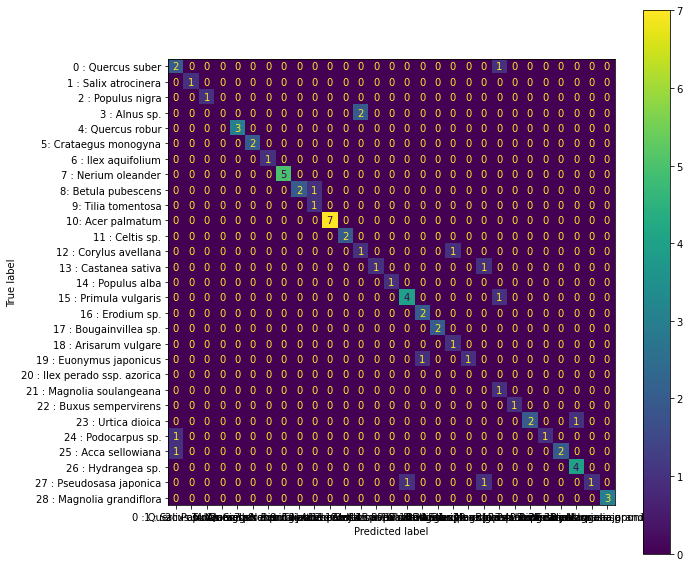

In [87]:
lrclf_cm = confusion_matrix(y_test, lrclf_y_pred)

lrclf_cm = confusion_matrix(y_test, lrclf_y_pred)
plt.rcParams['figure.figsize'] = [10, 10]
lrclf_cm_display = ConfusionMatrixDisplay(confusion_matrix = lrclf_cm, display_labels=classes)

lrclf_cm_display.plot()

In [88]:
lrclf_acc_score = accuracy_score(y_test, lrclf_y_pred)

print("Accuracy: {:.2f}%".format(lrclf_acc_score * 100))

Accuracy: 80.88%


Classification Report

In [89]:
print(classification_report(y_test, lrclf_y_pred))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5
           8       1.00      0.67      0.80         3
           9       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         2
          12       0.33      0.50      0.40         2
          13       1.00      0.50      0.67         2
          14       1.00      1.00      1.00         1
          15       0.80      0.80      0.80         5
          17       0.67      1.00      0.80         2
          18       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

In [90]:
def get_metrics(y_test, lrclf_y_pred):
    accuracy = accuracy_score(y_test, lrclf_y_pred)
    precision = precision_score(y_test, lrclf_y_pred, average='weighted')
    recall = recall_score(y_test, lrclf_y_pred, average='weighted')
    f1 = f1_score(y_test, lrclf_y_pred, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, lrclf_y_pred)

print("accuracy = %.2f%% \nprecision = %.2f%% \nrecall = %.2f%% \nf1 = %.2f%%" % (accuracy * 100, precision * 100, recall * 100, f1 * 100))

accuracy = 80.88% 
precision = 86.81% 
recall = 80.88% 
f1 = 81.18%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



True Positive Rate (TPR) and False Positive Rate (FPR)

In [91]:
FP = confusion_matrix(y_test, lrclf_y_pred).sum(axis=0) - np.diag(confusion_matrix(y_test, lrclf_y_pred))  
FN = confusion_matrix(y_test, lrclf_y_pred).sum(axis=1) - np.diag(confusion_matrix(y_test, lrclf_y_pred)) 
TP = np.diag(confusion_matrix(y_test, lrclf_y_pred)) 
TN = confusion_matrix(y_test, lrclf_y_pred).sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [92]:
TPR

array([0.66666667, 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       1.        , 1.        , 0.5       , 0.5       , 1.        ,
       0.8       , 1.        , 1.        , 1.        , 0.5       ,
              nan, 1.        , 1.        , 0.66666667, 0.5       ,
       0.66666667, 1.        , 0.33333333, 1.        ])

In [93]:
FPR

array([0.03076923, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01492537,
       0.        , 0.        , 0.03030303, 0.        , 0.        ,
       0.01587302, 0.01515152, 0.        , 0.01492537, 0.        ,
       0.02941176, 0.02985075, 0.        , 0.        , 0.        ,
       0.        , 0.015625  , 0.        , 0.        ])

**Naive Bayes classifier**

Training with default parameters

In [94]:
nbclf = GaussianNB()

In [95]:
nbclf.fit(X_train, y_train)

GaussianNB()

In [96]:
nbclf_y_pred = nbclf.predict(X_test)

Confusion Matrix

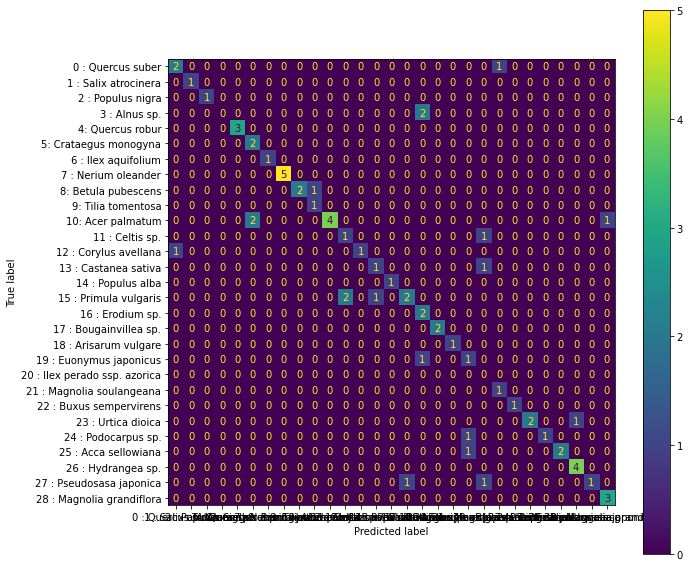

In [97]:
nbclf_cm = confusion_matrix(y_test, nbclf_y_pred)

nbclf_cm = confusion_matrix(y_test, nbclf_y_pred)
plt.rcParams['figure.figsize'] = [10, 10]
nbclf_cm_display = ConfusionMatrixDisplay(confusion_matrix = nbclf_cm, display_labels=classes)

nbclf_cm_display.plot()

In [98]:
nbclf_acc_score = accuracy_score(y_test, nbclf_y_pred)

print("Accuracy: {:.2f}%".format(nbclf_acc_score * 100))

Accuracy: 72.06%


Classification Report

In [99]:
print(classification_report(y_test, nbclf_y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5
           8       1.00      0.67      0.80         3
           9       0.50      1.00      0.67         1
          10       1.00      0.57      0.73         7
          11       0.33      0.50      0.40         2
          12       1.00      0.50      0.67         2
          13       0.50      0.50      0.50         2
          14       1.00      1.00      1.00         1
          15       0.67      0.40      0.50         5
          17       0.40      1.00      0.57         2
          18       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

In [100]:
def get_metrics(y_test, nbclf_y_pred):
    accuracy = accuracy_score(y_test, nbclf_y_pred)
    precision = precision_score(y_test, nbclf_y_pred, average='weighted')
    recall = recall_score(y_test, nbclf_y_pred, average='weighted')
    f1 = f1_score(y_test, nbclf_y_pred, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, nbclf_y_pred)

print("accuracy = %.2f%% \nprecision = %.2f%% \nrecall = %.2f%% \nf1 = %.2f%%" % (accuracy * 100, precision * 100, recall * 100, f1 * 100))

accuracy = 72.06% 
precision = 80.76% 
recall = 72.06% 
f1 = 72.79%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



True Positive Rate (TPR) and False Positive Rate (FPR)

In [101]:
FP = confusion_matrix(y_test, nbclf_y_pred).sum(axis=0) - np.diag(confusion_matrix(y_test, nbclf_y_pred))  
FN = confusion_matrix(y_test, nbclf_y_pred).sum(axis=1) - np.diag(confusion_matrix(y_test, nbclf_y_pred)) 
TP = np.diag(confusion_matrix(y_test, nbclf_y_pred)) 
TN = confusion_matrix(y_test, nbclf_y_pred).sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [102]:
TPR

array([0.66666667, 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       0.57142857, 0.5       , 0.5       , 0.5       , 1.        ,
       0.4       , 1.        , 1.        , 1.        , 0.5       ,
              nan, 1.        , 1.        , 0.66666667, 0.5       ,
       0.66666667, 1.        , 0.33333333, 1.        ])

In [103]:
FPR

array([0.01538462, 0.        , 0.        , 0.        , 0.        ,
       0.03030303, 0.        , 0.        , 0.        , 0.01492537,
       0.        , 0.03030303, 0.        , 0.01515152, 0.        ,
       0.01587302, 0.04545455, 0.        , 0.        , 0.03030303,
       0.04411765, 0.01492537, 0.        , 0.        , 0.        ,
       0.        , 0.015625  , 0.        , 0.01538462])

**Support Vector Machine (SVM)**

Training with default parameters

In [104]:
svmclf1 = SVC()

In [105]:
svmclf1.fit(X_train, y_train)

SVC()

In [106]:
svmclf1_y_pred = svmclf1.predict(X_test)

Confusion Matrix

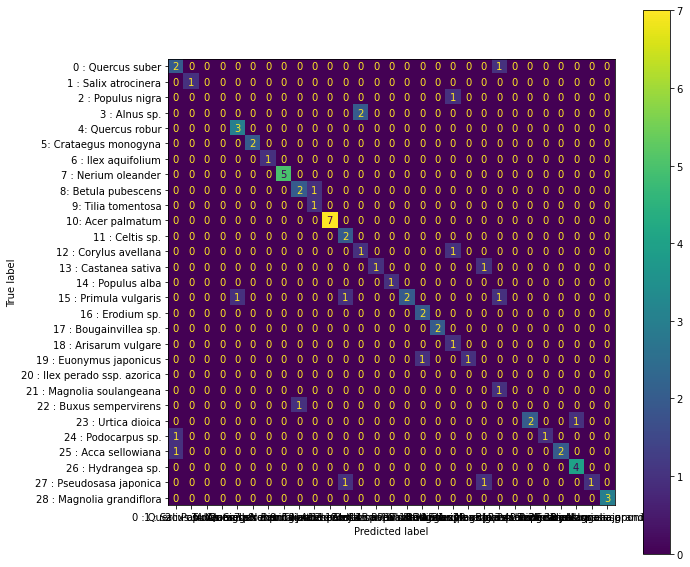

In [107]:
svmclf1_cm = confusion_matrix(y_test, svmclf1_y_pred)

svmclf1_cm = confusion_matrix(y_test, svmclf1_y_pred)
plt.rcParams['figure.figsize'] = [10, 10]
svmclf1_cm_display = ConfusionMatrixDisplay(confusion_matrix = svmclf1_cm, display_labels=classes)

svmclf1_cm_display.plot()

In [108]:
svmclf1_acc_score = accuracy_score(y_test, svmclf1_y_pred)

print("Accuracy: {:.2f}%".format(svmclf1_acc_score * 100))

Accuracy: 75.00%


Classification Report

In [109]:
print(classification_report(y_test, svmclf1_y_pred))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5
           8       0.67      0.67      0.67         3
           9       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         7
          11       0.50      1.00      0.67         2
          12       0.33      0.50      0.40         2
          13       1.00      0.50      0.67         2
          14       1.00      1.00      1.00         1
          15       1.00      0.40      0.57         5
          17       0.67      1.00      0.80         2
          18       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

In [110]:
def get_metrics(y_test, svmclf1_y_pred):
    accuracy = accuracy_score(y_test, svmclf1_y_pred)
    precision = precision_score(y_test, svmclf1_y_pred, average='weighted')
    recall = recall_score(y_test, svmclf1_y_pred, average='weighted')
    f1 = f1_score(y_test, svmclf1_y_pred, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, svmclf1_y_pred)

print("accuracy = %.2f%% \nprecision = %.2f%% \nrecall = %.2f%% \nf1 = %.2f%%" % (accuracy * 100, precision * 100, recall * 100, f1 * 100))

accuracy = 75.00% 
precision = 81.05% 
recall = 75.00% 
f1 = 74.12%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



True Positive Rate (TPR) and False Positive Rate (FPR)

In [111]:
FP = confusion_matrix(y_test, svmclf1_y_pred).sum(axis=0) - np.diag(confusion_matrix(y_test, svmclf1_y_pred))  
FN = confusion_matrix(y_test, svmclf1_y_pred).sum(axis=1) - np.diag(confusion_matrix(y_test, svmclf1_y_pred)) 
TP = np.diag(confusion_matrix(y_test, svmclf1_y_pred)) 
TN = confusion_matrix(y_test, svmclf1_y_pred).sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [112]:
TPR

array([0.66666667, 1.        , 0.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       1.        , 1.        , 0.5       , 0.5       , 1.        ,
       0.4       , 1.        , 1.        , 1.        , 0.5       ,
              nan, 1.        , 0.        , 0.66666667, 0.5       ,
       0.66666667, 1.        , 0.33333333, 1.        ])

In [113]:
FPR

array([0.03076923, 0.        , 0.        , 0.        , 0.01538462,
       0.        , 0.        , 0.        , 0.01538462, 0.01492537,
       0.        , 0.03030303, 0.03030303, 0.        , 0.        ,
       0.        , 0.01515152, 0.        , 0.02985075, 0.        ,
       0.02941176, 0.02985075, 0.        , 0.        , 0.        ,
       0.        , 0.015625  , 0.        , 0.        ])

Training with custom parameters

In [114]:
svmclf2 = SVC(kernel='poly')

In [115]:
svmclf2.fit(X_train, y_train)

SVC(kernel='poly')

In [116]:
svmclf2_y_pred = svmclf2.predict(X_test)

Confusion Matrix

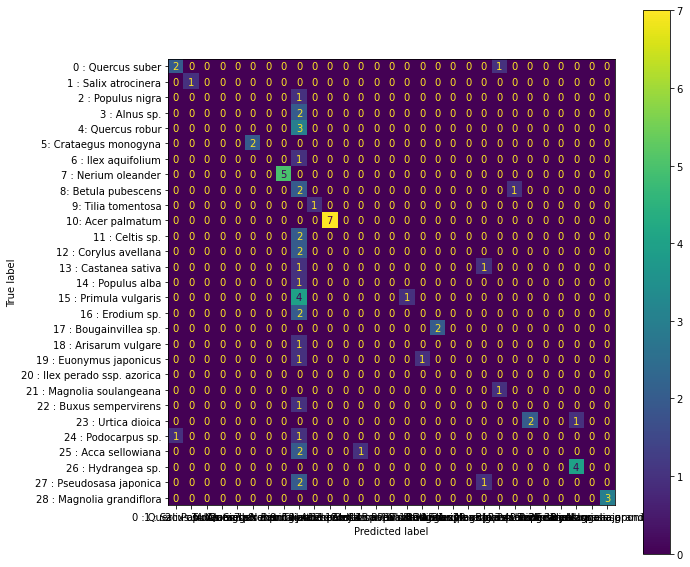

In [117]:
svmclf2_cm = confusion_matrix(y_test, svmclf2_y_pred)

svmclf2_cm = confusion_matrix(y_test, svmclf2_y_pred)
plt.rcParams['figure.figsize'] = [10, 10]
svmclf2_cm_display = ConfusionMatrixDisplay(confusion_matrix = svmclf2_cm, display_labels=classes)

svmclf2_cm_display.plot()

In [118]:
svmclf2_acc_score = accuracy_score(y_test, svmclf2_y_pred)

print("Accuracy: {:.2f}%".format(svmclf2_acc_score * 100))

Accuracy: 48.53%


Classification Report

In [119]:
print(classification_report(y_test, svmclf2_y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         5
           8       0.07      0.67      0.12         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         7
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       1.00      0.20      0.33         5
          17       0.00      0.00      0.00         2
          18       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

In [120]:
def get_metrics(y_test, svmclf2_y_pred):
    accuracy = accuracy_score(y_test, svmclf2_y_pred)
    precision = precision_score(y_test, svmclf2_y_pred, average='weighted')
    recall = recall_score(y_test, svmclf2_y_pred, average='weighted')
    f1 = f1_score(y_test, svmclf2_y_pred, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, svmclf2_y_pred)

print("accuracy = %.2f%% \nprecision = %.2f%% \nrecall = %.2f%% \nf1 = %.2f%%" % (accuracy * 100, precision * 100, recall * 100, f1 * 100))

accuracy = 48.53% 
precision = 51.33% 
recall = 48.53% 
f1 = 46.56%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



True Positive Rate (TPR) and False Positive Rate (FPR)

In [121]:
FP = confusion_matrix(y_test, svmclf2_y_pred).sum(axis=0) - np.diag(confusion_matrix(y_test, svmclf2_y_pred))  
FN = confusion_matrix(y_test, svmclf2_y_pred).sum(axis=1) - np.diag(confusion_matrix(y_test, svmclf2_y_pred)) 
TP = np.diag(confusion_matrix(y_test, svmclf2_y_pred)) 
TN = confusion_matrix(y_test, svmclf2_y_pred).sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [122]:
TPR

array([0.66666667, 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.66666667, 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.2       , 0.        , 1.        , 0.        , 0.        ,
              nan, 1.        , 0.        , 0.66666667, 0.        ,
       0.        , 1.        , 0.        , 1.        ])

In [123]:
FPR

array([0.01538462, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.41538462, 0.        ,
       0.        , 0.        , 0.01515152, 0.        , 0.        ,
       0.        , 0.01515152, 0.        , 0.        , 0.        ,
       0.02941176, 0.01492537, 0.01492537, 0.        , 0.        ,
       0.        , 0.015625  , 0.        , 0.        ])